In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression #Lasso回归、岭回归，线性回归，逻辑回归
from sklearn.model_selection import train_test_split #自动进行切割
from sklearn.model_selection import GridSearchCV #表格搜索
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier #KNN回归
from sklearn.ensemble import ExtraTreesRegressor #随机森林
import sklearn.datasets as datasets #导入内置数据
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
digits = datasets.load_digits()
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [3]:
data = digits.data
target = digits.target
data.shape

(1797, 64)

In [4]:
target.shape

(1797,)

In [5]:
images = digits.images
images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

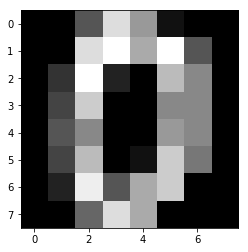

In [6]:
plt.imshow(images[0], cmap="gray")

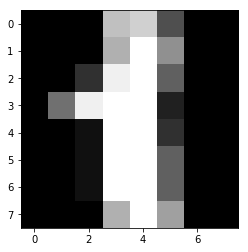

In [7]:
plt.imshow(images[1], cmap="gray")

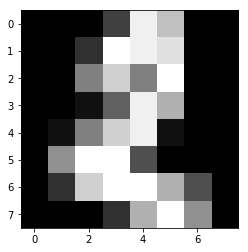

In [8]:
plt.imshow(images[2], cmap="gray")

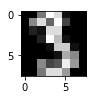

In [11]:
plt.figure(figsize=(2, 1.2))
plt.imshow(images[3], cmap="gray")

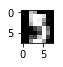

In [12]:
plt.figure(figsize=(1, 0.6))
plt.imshow(images[5], cmap="gray")

In [13]:
images[3].shape

(8, 8)

In [14]:
data[3].shape

(64,)

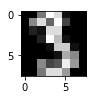

In [15]:
plt.figure(figsize=(2, 1.2))
plt.imshow(data[3].reshape(8, 8), cmap="gray")

In [16]:
target[3]

3

In [18]:
x_train = data[::2]
y_train = target[::2]
x_test = data[::5]
y_test = target[::5]
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9888888888888889

In [20]:
lgr = LogisticRegression()
lgr.fit(x_train, y_train)
lgr.score(x_test, y_test)

0.9638888888888889

In [21]:
extra = ExtraTreesRegressor()
extra.fit(x_train, y_train)
extra.score(x_test, y_test)

0.9247100889060688

In [22]:
rid = Ridge()
rid.fit(x_train, y_train)
rid.score(x_test, y_test)
# 这里之所以准确率很低是因为岭回归是回归模型，不是分类模型

0.5915540378352981